In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.datasets import load_iris

In [4]:
# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [5]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [7]:
# Introducing some missing values for demonstration purposes
df.loc[5:10, 'sepal length (cm)'] = np.nan
df.loc[15:20, 'petal width (cm)'] = np.nan

In [8]:
print("\nOriginal Dataset:")
print(df.head())


Original Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [9]:
# Step 2: Handle missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal length (cm)    6
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     6
target               0
dtype: int64


In [10]:
# Filling missing values with the mean of the respective columns
df.fillna(df.mean(), inplace=True)

In [11]:
print("\nDataset after handling missing values:")
print(df.isnull().sum())


Dataset after handling missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [12]:
# Step 3: Detect and handle outliers
# Using Z-score to identify outliers
z_scores = zscore(df.iloc[:, :-1])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)

In [13]:
print("\nOutliers detected (Z-score > 3):")
print(df[outliers])


Outliers detected (Z-score > 3):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5          1.236111   

    target  
15       0  


In [14]:
# Removing outliers
df = df[~outliers]


Dataset after transformations:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  sepal length (cm)_scaled  petal width (cm)_transformed  
0       0                  0.222222                     -1.394147  
1       0                  0.166667                     -1.394147  
2       0                  0.111111                     -1.394147  
3       0                  0.083333                     -1.394147  
4       0                  0.194444                     -1.394147  


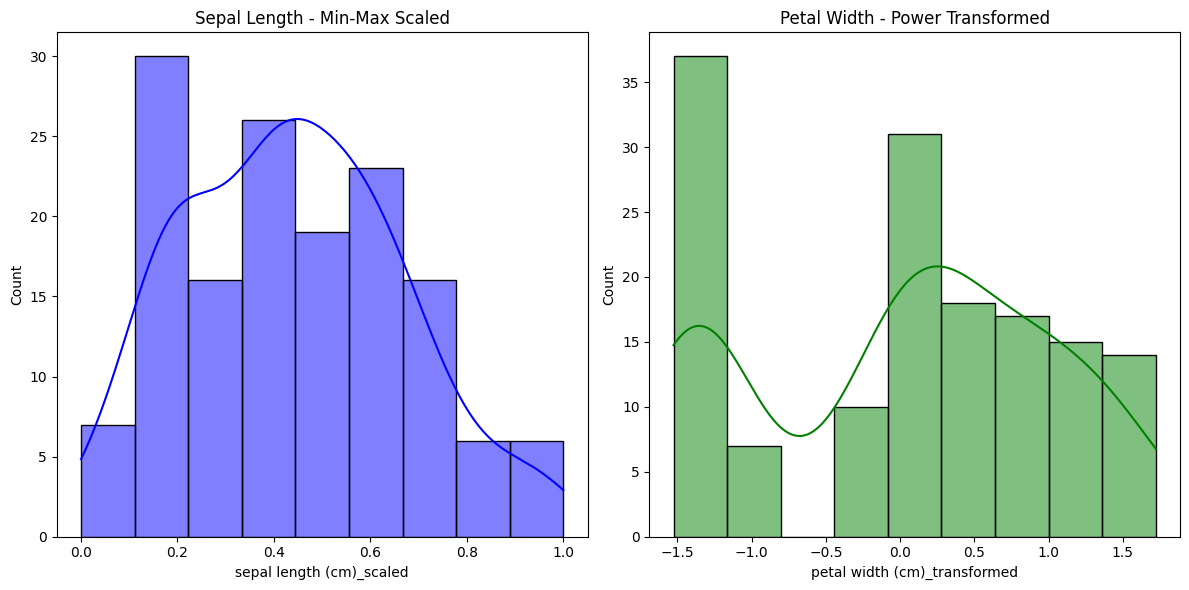

In [15]:
# Step 4: Apply data transformation
# Applying Min-Max scaling on 'sepal length (cm)'
scaler = MinMaxScaler()
df['sepal length (cm)_scaled'] = scaler.fit_transform(df[['sepal length (cm)']])

# Applying Power Transformation (Yeo-Johnson) on 'petal width (cm)' to reduce skewness
transformer = PowerTransformer(method='yeo-johnson')
df['petal width (cm)_transformed'] = transformer.fit_transform(df[['petal width (cm)']])

print("\nDataset after transformations:")
print(df.head())

# Visualizing transformations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['sepal length (cm)_scaled'], kde=True, color='blue')
plt.title('Sepal Length - Min-Max Scaled')

plt.subplot(1, 2, 2)
sns.histplot(df['petal width (cm)_transformed'], kde=True, color='green')
plt.title('Petal Width - Power Transformed')

plt.tight_layout()
plt.show()